<a href="https://colab.research.google.com/github/hASEEBjAN/TensorFlow_Random_Programs/blob/master/UG_Adult_Income_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd
!cp /content/drive/My\ Drive/adult.data.txt /content
!cp /content/drive/My\ Drive/adult.test.txt /content
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
adult.data.txt	adult.test.txt	drive  sample_data


In [ ]:
#importing bassic libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for mathematical operations

#importing libraries for data visulaization and ploting
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data ploting
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

#importing all the required ML packages
import sklearn

#inporting libraries from Scikit-Learn
from sklearn.cluster import KMeans #importing K-Mean clustering algorthm
from sklearn import metrics 
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import silhouette_samples #sampler for clusters
from sklearn.metrics import silhouette_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report


from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.linear_model import Perceptron
from sklearn import svm #support vector Machine
from sklearn.svm import SVC #support vector classifier
from sklearn.svm import SVR #SVC==S
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.neural_network import MLPClassifier

# Feature Selection and Encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import math

In [ ]:
train_data=pd.read_csv('adult.data.txt',delimiter=', ',index_col=False,engine='python')
test_data=pd.read_csv('adult.test.txt',delimiter=', ',index_col=False,engine='python')

In [ ]:
print(train_data.columns)
train_data.head()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
print(test_data.columns)
test_data.head()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
train_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
train_data.isnull().sum()
test_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
train_data.age = train_data.age.astype(float)
train_data['hours-per-week'] = train_data['hours-per-week'].astype(float)
test_data.age = test_data.age.astype(float)
test_data['hours-per-week'] = test_data['hours-per-week'].astype(float)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null float64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null float64
native-country    32561 non-null object
income            32561 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [ ]:
print('workclass',train_data.workclass.unique())
print('education',train_data.education.unique())
print('marital-status',train_data['marital-status'].unique())
print('occupation',train_data.occupation.unique())
print('relationship',train_data.relationship.unique())
print('race',train_data.race.unique())
print('sex',train_data.sex.unique())
print('native-country',train_data['native-country'].unique())
print('income',train_data.income.unique())

workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex ['Male' 'Female']
native-country ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 

In [ ]:
train_data['education'].replace('Preschool', 'dropout',inplace=True)
train_data['education'].replace('10th', 'dropout',inplace=True)
train_data['education'].replace('11th', 'dropout',inplace=True)
train_data['education'].replace('12th', 'dropout',inplace=True)
train_data['education'].replace('1st-4th', 'dropout',inplace=True)
train_data['education'].replace('5th-6th', 'dropout',inplace=True)
train_data['education'].replace('7th-8th', 'dropout',inplace=True)
train_data['education'].replace('9th', 'dropout',inplace=True)
train_data['education'].replace('HS-Grad', 'HighGrad',inplace=True)
train_data['education'].replace('HS-grad', 'HighGrad',inplace=True)
train_data['education'].replace('Some-college', 'CommunityCollege',inplace=True)
train_data['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
train_data['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
train_data['education'].replace('Bachelors', 'Bachelors',inplace=True)
train_data['education'].replace('Masters', 'Masters',inplace=True)
train_data['education'].replace('Prof-school', 'Masters',inplace=True)
train_data['education'].replace('Doctorate', 'Doctorate',inplace=True)

test_data['education'].replace('Preschool', 'dropout',inplace=True)
test_data['education'].replace('10th', 'dropout',inplace=True)
test_data['education'].replace('11th', 'dropout',inplace=True)
test_data['education'].replace('12th', 'dropout',inplace=True)
test_data['education'].replace('1st-4th', 'dropout',inplace=True)
test_data['education'].replace('5th-6th', 'dropout',inplace=True)
test_data['education'].replace('7th-8th', 'dropout',inplace=True)
test_data['education'].replace('9th', 'dropout',inplace=True)
test_data['education'].replace('HS-Grad', 'HighGrad',inplace=True)
test_data['education'].replace('HS-grad', 'HighGrad',inplace=True)
test_data['education'].replace('Some-college', 'CommunityCollege',inplace=True)
test_data['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
test_data['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
test_data['education'].replace('Bachelors', 'Bachelors',inplace=True)
test_data['education'].replace('Masters', 'Masters',inplace=True)
test_data['education'].replace('Prof-school', 'Masters',inplace=True)
test_data['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [ ]:
train_data[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)
test_data[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
2,Doctorate,16.000000
4,Masters,14.216443
0,Bachelors,13.000000
1,CommunityCollege,10.363958
3,HighGrad,9.000000
5,dropout,5.638515


In [ ]:
train_data['marital-status'].replace('Never-married', 'unMarried',inplace=True)
train_data['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
train_data['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
train_data['marital-status'].replace(['Married-spouse-absent'], 'Married',inplace=True)
train_data['marital-status'].replace(['Separated'], 'Separated',inplace=True)
train_data['marital-status'].replace(['Divorced'], 'Separated',inplace=True)

test_data['marital-status'].replace('Never-married', 'unMarried',inplace=True)
test_data['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
test_data['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
test_data['marital-status'].replace(['Married-spouse-absent'], 'Married',inplace=True)
test_data['marital-status'].replace(['Separated'], 'Separated',inplace=True)
test_data['marital-status'].replace(['Divorced'], 'Separated',inplace=True)


In [ ]:
print('marital-status grouping with age')
train_data[['marital-status', 'age']].groupby(['marital-status'], as_index=False).mean().sort_values(by='age', ascending=False)
test_data[['marital-status', 'age']].groupby(['marital-status'], as_index=False).mean().sort_values(by='age', ascending=False)
print('\ngrouping of income with age')
train_data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)
test_data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

marital-status grouping with age

grouping of income with age


,income,age
1,>50K.,44.326833
0,<=50K.,37.048010


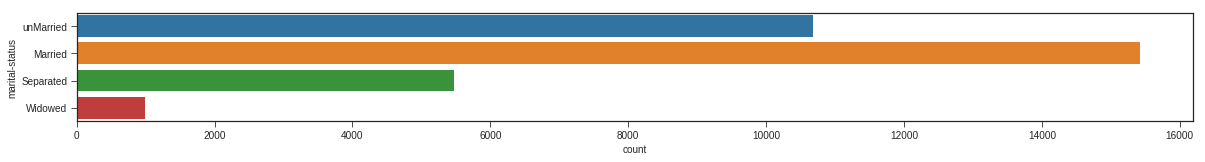

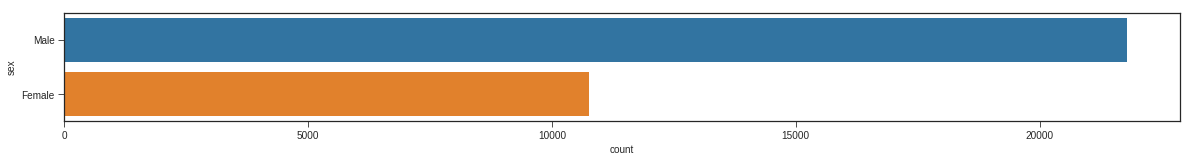

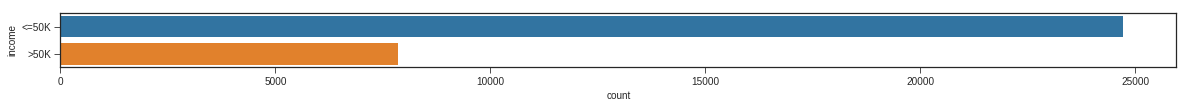

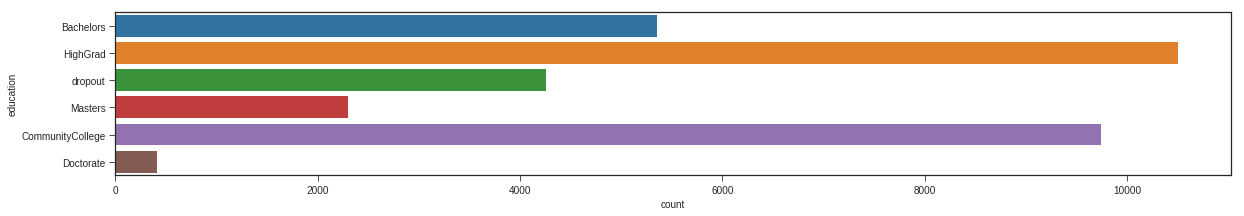

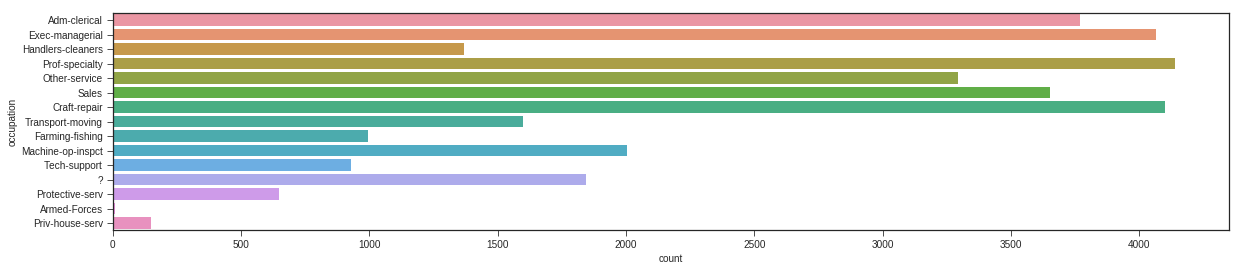

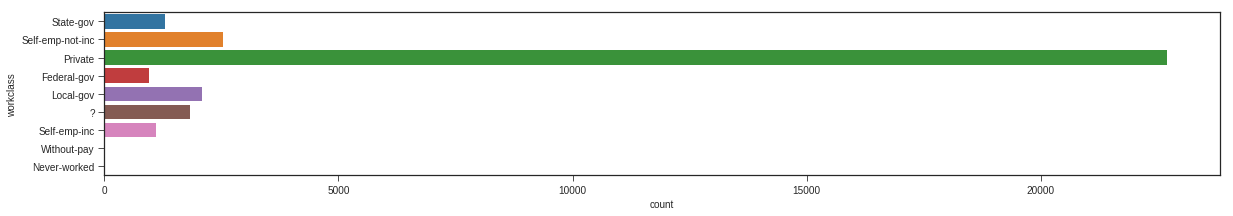

In [ ]:
#ploting all features
#ploting marital-status with respect to number of samples
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=train_data)
#ploting sex with respect to number of samples
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="sex", data=train_data)
#ploting income with respect to number of samples
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=train_data)
#ploting education with respect to number of samples
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=train_data)
#ploting occupation with respect to number of samples
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=train_data)
#ploting workclass with respect to number of samples
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=train_data)

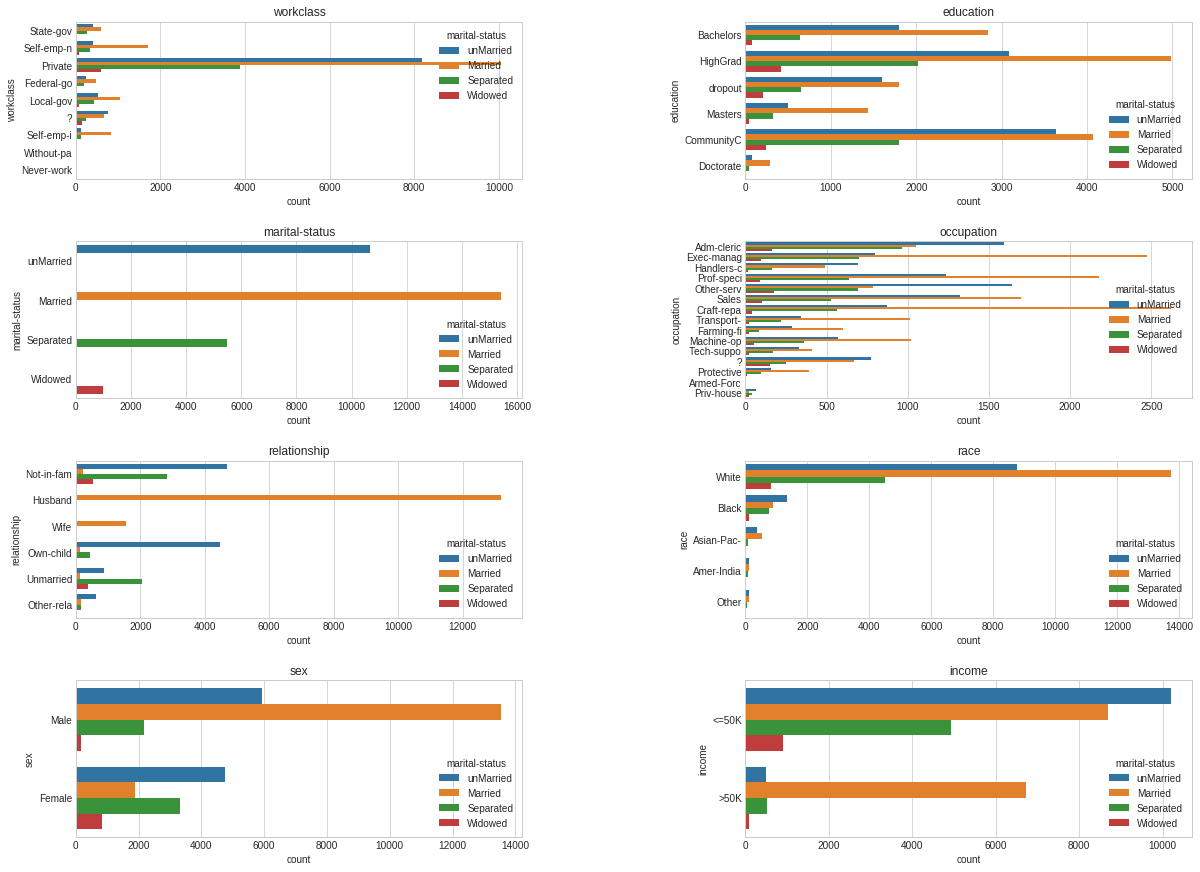

In [ ]:
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = train_data.loc[:, ['workclass', 'education', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex','income']]  

plot_bivariate_bar(bivariate_df, hue='marital-status', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)


<Figure size 1440x360 with 0 Axes>

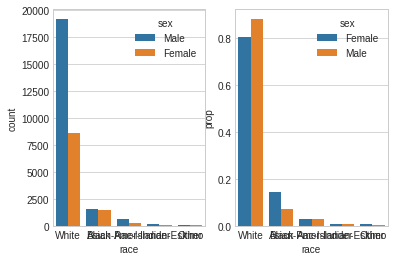

In [ ]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=train_data, ax=axes[0])

prop_df = (train_data[x]
           .groupby(train_data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


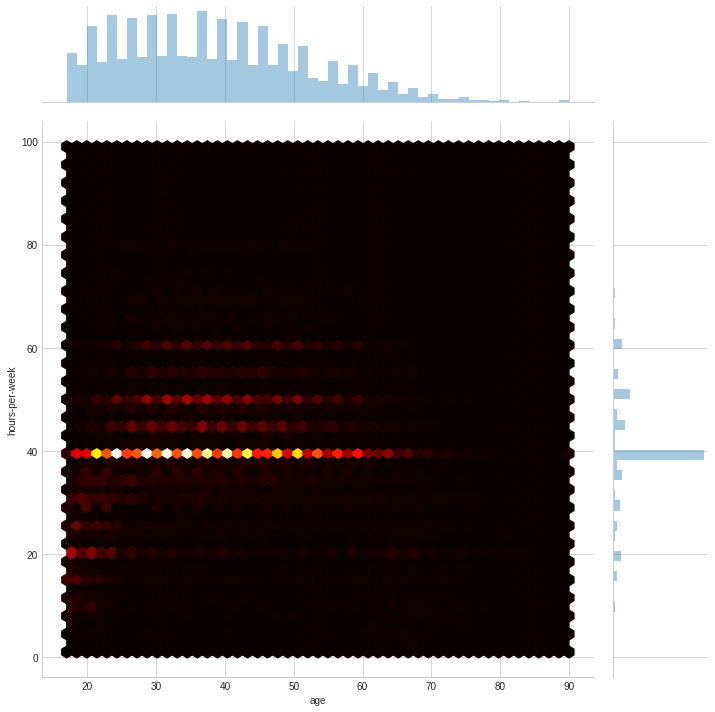

In [ ]:
g = sns.jointplot(x = 'age', 
              y = 'hours-per-week',
              data = train_data, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


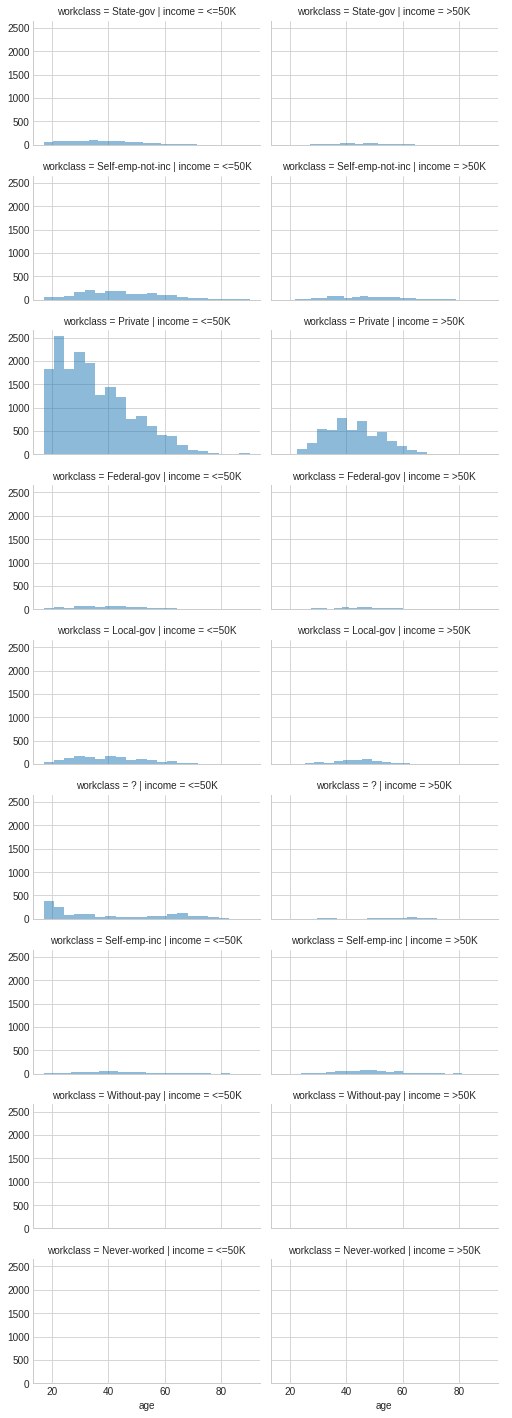

In [ ]:
grid = sns.FacetGrid(train_data, col='income', row='workclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

prop_df = (train_data[x]
           .groupby(train_data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

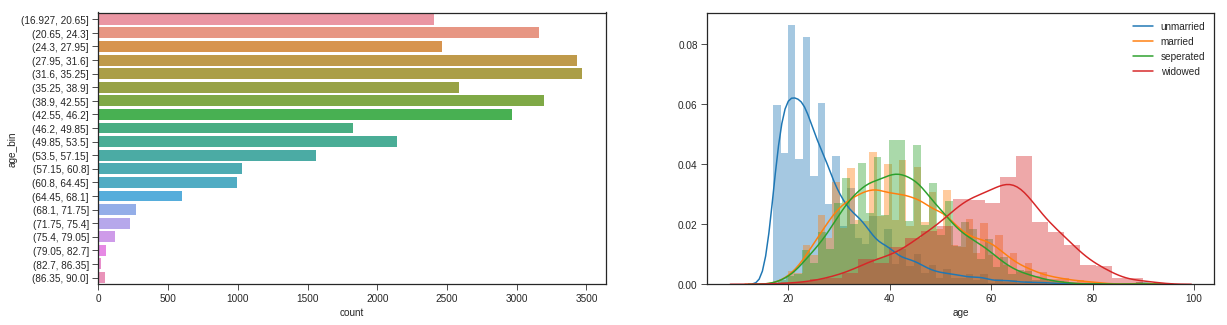

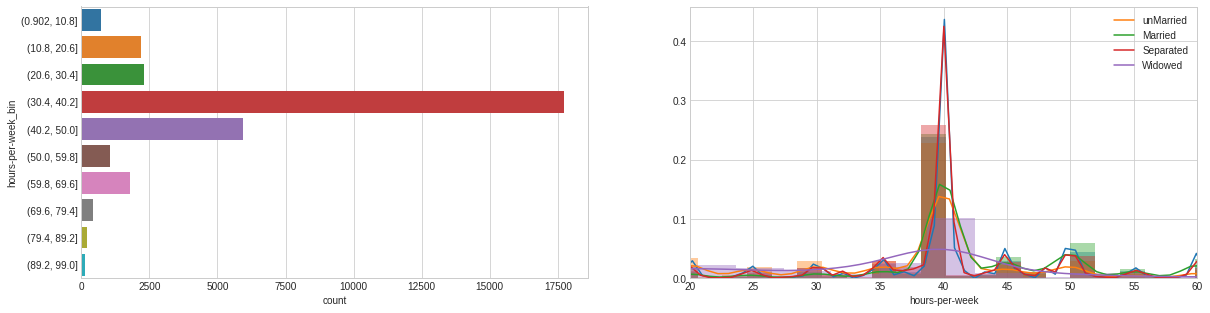

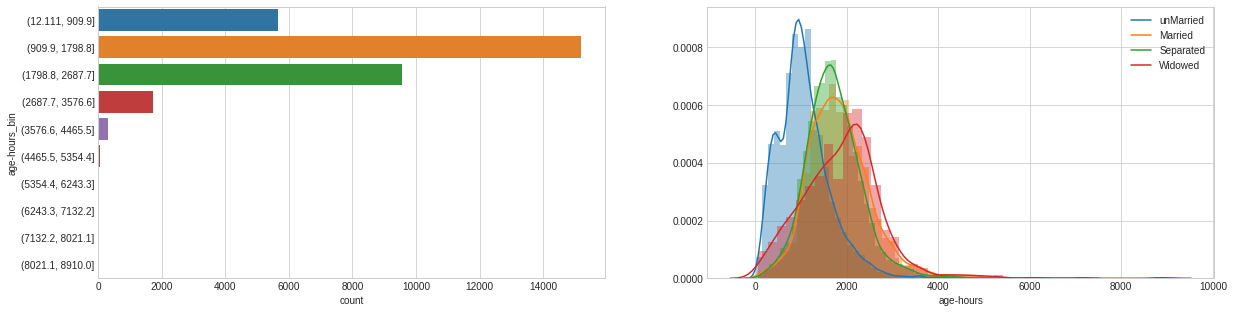

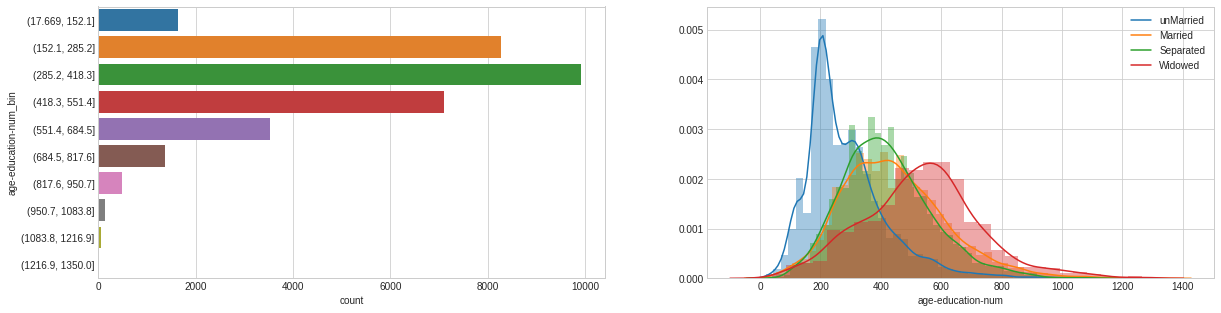

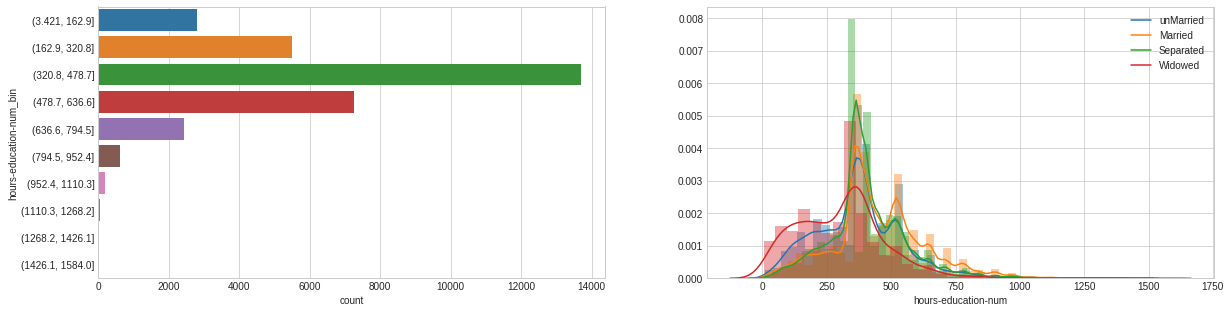

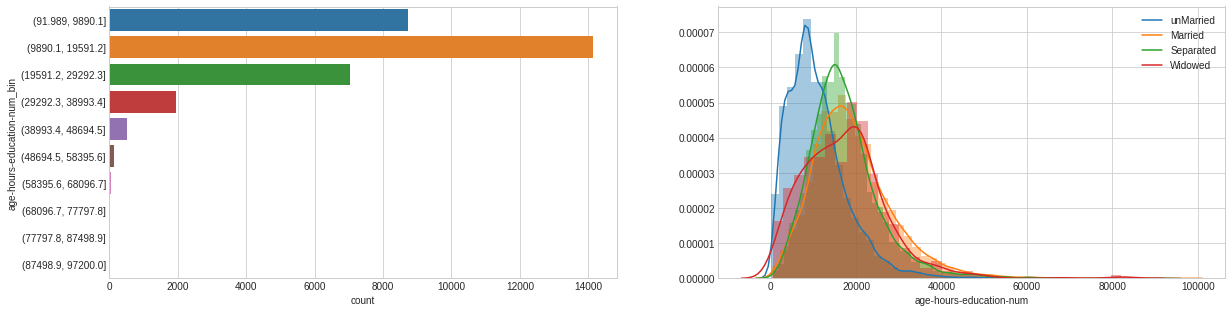

In [ ]:
# make the age variable discretized 
train_data['age_bin'] = pd.cut(train_data['age'], 20)
test_data['age_bin'] = pd.cut(train_data['age'], 20)
#ploting discretized age variable with respect to counts
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=train_data)
plt.subplot(1, 2, 2)
#ploting marital status with respect to discretized age variable
sns.distplot(train_data[train_data['marital-status'] == 'unMarried']['age'], kde_kws={"label": "unmarried"})
sns.distplot(train_data[train_data['marital-status'] == 'Married']['age'], kde_kws={"label": "married"})
sns.distplot(train_data[train_data['marital-status'] == 'Separated']['age'], kde_kws={"label": "seperated"})
sns.distplot(train_data[train_data['marital-status'] == 'Widowed']['age'], kde_kws={"label": "widowed"})

# Let's use the Pandas Cut function to bin the data in equally sized buckets
train_data['hours-per-week_bin'] = pd.cut(train_data['hours-per-week'], 10)
train_data['hours-per-week'] = train_data['hours-per-week']
# Let's use the Pandas Cut function to bin the data in equally sized buckets
test_data['hours-per-week_bin'] = pd.cut(train_data['hours-per-week'], 10)
test_data['hours-per-week'] = train_data['hours-per-week']
#ploting marital status with respect to hours-per-week.
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=train_data);
plt.subplot(1, 2, 2)
#lets plot relation between marital-status with hours-per-week work.
sns.distplot(train_data['hours-per-week']);
sns.distplot(train_data[train_data['marital-status'] == 'unMarried']['hours-per-week'], kde_kws={"label": "unMarried"})
sns.distplot(train_data[train_data['marital-status'] == 'Married']['hours-per-week'], kde_kws={"label": "Married"})
sns.distplot(train_data[train_data['marital-status'] == 'Separated']['hours-per-week'], kde_kws={"label": "Separated"})
sns.distplot(train_data[train_data['marital-status'] == 'Widowed']['hours-per-week'], kde_kws={"label": "Widowed"})
plt.ylim(0, None)
plt.xlim(20, 60)

# Crossing Numerical Features
train_data['age-hours'] = train_data['age']*train_data['hours-per-week']
train_data['age-hours_bin'] = pd.cut(train_data['age-hours'], 10)
# Crossing Numerical Features
test_data['age-hours'] = test_data['age']*test_data['hours-per-week']
test_data['age-hours_bin'] = pd.cut(test_data['age-hours'], 10)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=train_data);
plt.subplot(1, 2, 2)
sns.distplot(train_data[train_data['marital-status'] == 'unMarried']['age-hours'], kde_kws={"label": "unMarried"})
sns.distplot(train_data[train_data['marital-status'] == 'Married']['age-hours'], kde_kws={"label": "Married"})
sns.distplot(train_data[train_data['marital-status'] == 'Separated']['age-hours'], kde_kws={"label": "Separated"})
sns.distplot(train_data[train_data['marital-status'] == 'Widowed']['age-hours'], kde_kws={"label": "Widowed"})

# Crossing Numerical Features
train_data['age-education-num'] = train_data['age']*train_data['education-num']
train_data['age-education-num_bin'] = pd.cut(train_data['age-education-num'], 10)
# Crossing Numerical Features
test_data['age-education-num'] = test_data['age']*test_data['education-num']
test_data['age-education-num_bin'] = pd.cut(test_data['age-education-num'], 10)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-education-num_bin", data=train_data);
plt.subplot(1, 2, 2)
sns.distplot(train_data[train_data['marital-status'] == 'unMarried']['age-education-num'], kde_kws={"label": "unMarried"})
sns.distplot(train_data[train_data['marital-status'] == 'Married']['age-education-num'], kde_kws={"label": "Married"})
sns.distplot(train_data[train_data['marital-status'] == 'Separated']['age-education-num'], kde_kws={"label": "Separated"})
sns.distplot(train_data[train_data['marital-status'] == 'Widowed']['age-education-num'], kde_kws={"label": "Widowed"})

# Crossing Numerical Features
train_data['hours-education-num'] = train_data['hours-per-week']*train_data['education-num']
train_data['hours-education-num_bin'] = pd.cut(train_data['hours-education-num'], 10)
# Crossing Numerical Features
test_data['hours-education-num'] = test_data['hours-per-week']*test_data['education-num']
test_data['hours-education-num_bin'] = pd.cut(test_data['hours-education-num'], 10)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-education-num_bin", data=train_data);
plt.subplot(1, 2, 2)
sns.distplot(train_data[train_data['marital-status'] == 'unMarried']['hours-education-num'], kde_kws={"label": "unMarried"})
sns.distplot(train_data[train_data['marital-status'] == 'Married']['hours-education-num'], kde_kws={"label": "Married"})
sns.distplot(train_data[train_data['marital-status'] == 'Separated']['hours-education-num'], kde_kws={"label": "Separated"})
sns.distplot(train_data[train_data['marital-status'] == 'Widowed']['hours-education-num'], kde_kws={"label": "Widowed"})

# Crossing Numerical Features
train_data['age-hours-education-num'] = train_data['age']*train_data['hours-education-num']
train_data['age-hours-education-num_bin'] = pd.cut(train_data['age-hours-education-num'], 10)
# Crossing Numerical Features
test_data['age-hours-education-num'] = test_data['age']*test_data['hours-education-num']
test_data['age-hours-education-num_bin'] = pd.cut(test_data['age-hours-education-num'], 10)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours-education-num_bin", data=train_data);
plt.subplot(1, 2, 2)
sns.distplot(train_data[train_data['marital-status'] == 'unMarried']['age-hours-education-num'], kde_kws={"label": "unMarried"})
sns.distplot(train_data[train_data['marital-status'] == 'Married']['age-hours-education-num'], kde_kws={"label": "Married"})
sns.distplot(train_data[train_data['marital-status'] == 'Separated']['age-hours-education-num'], kde_kws={"label": "Separated"})
sns.distplot(train_data[train_data['marital-status'] == 'Widowed']['age-hours-education-num'], kde_kws={"label": "Widowed"})

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


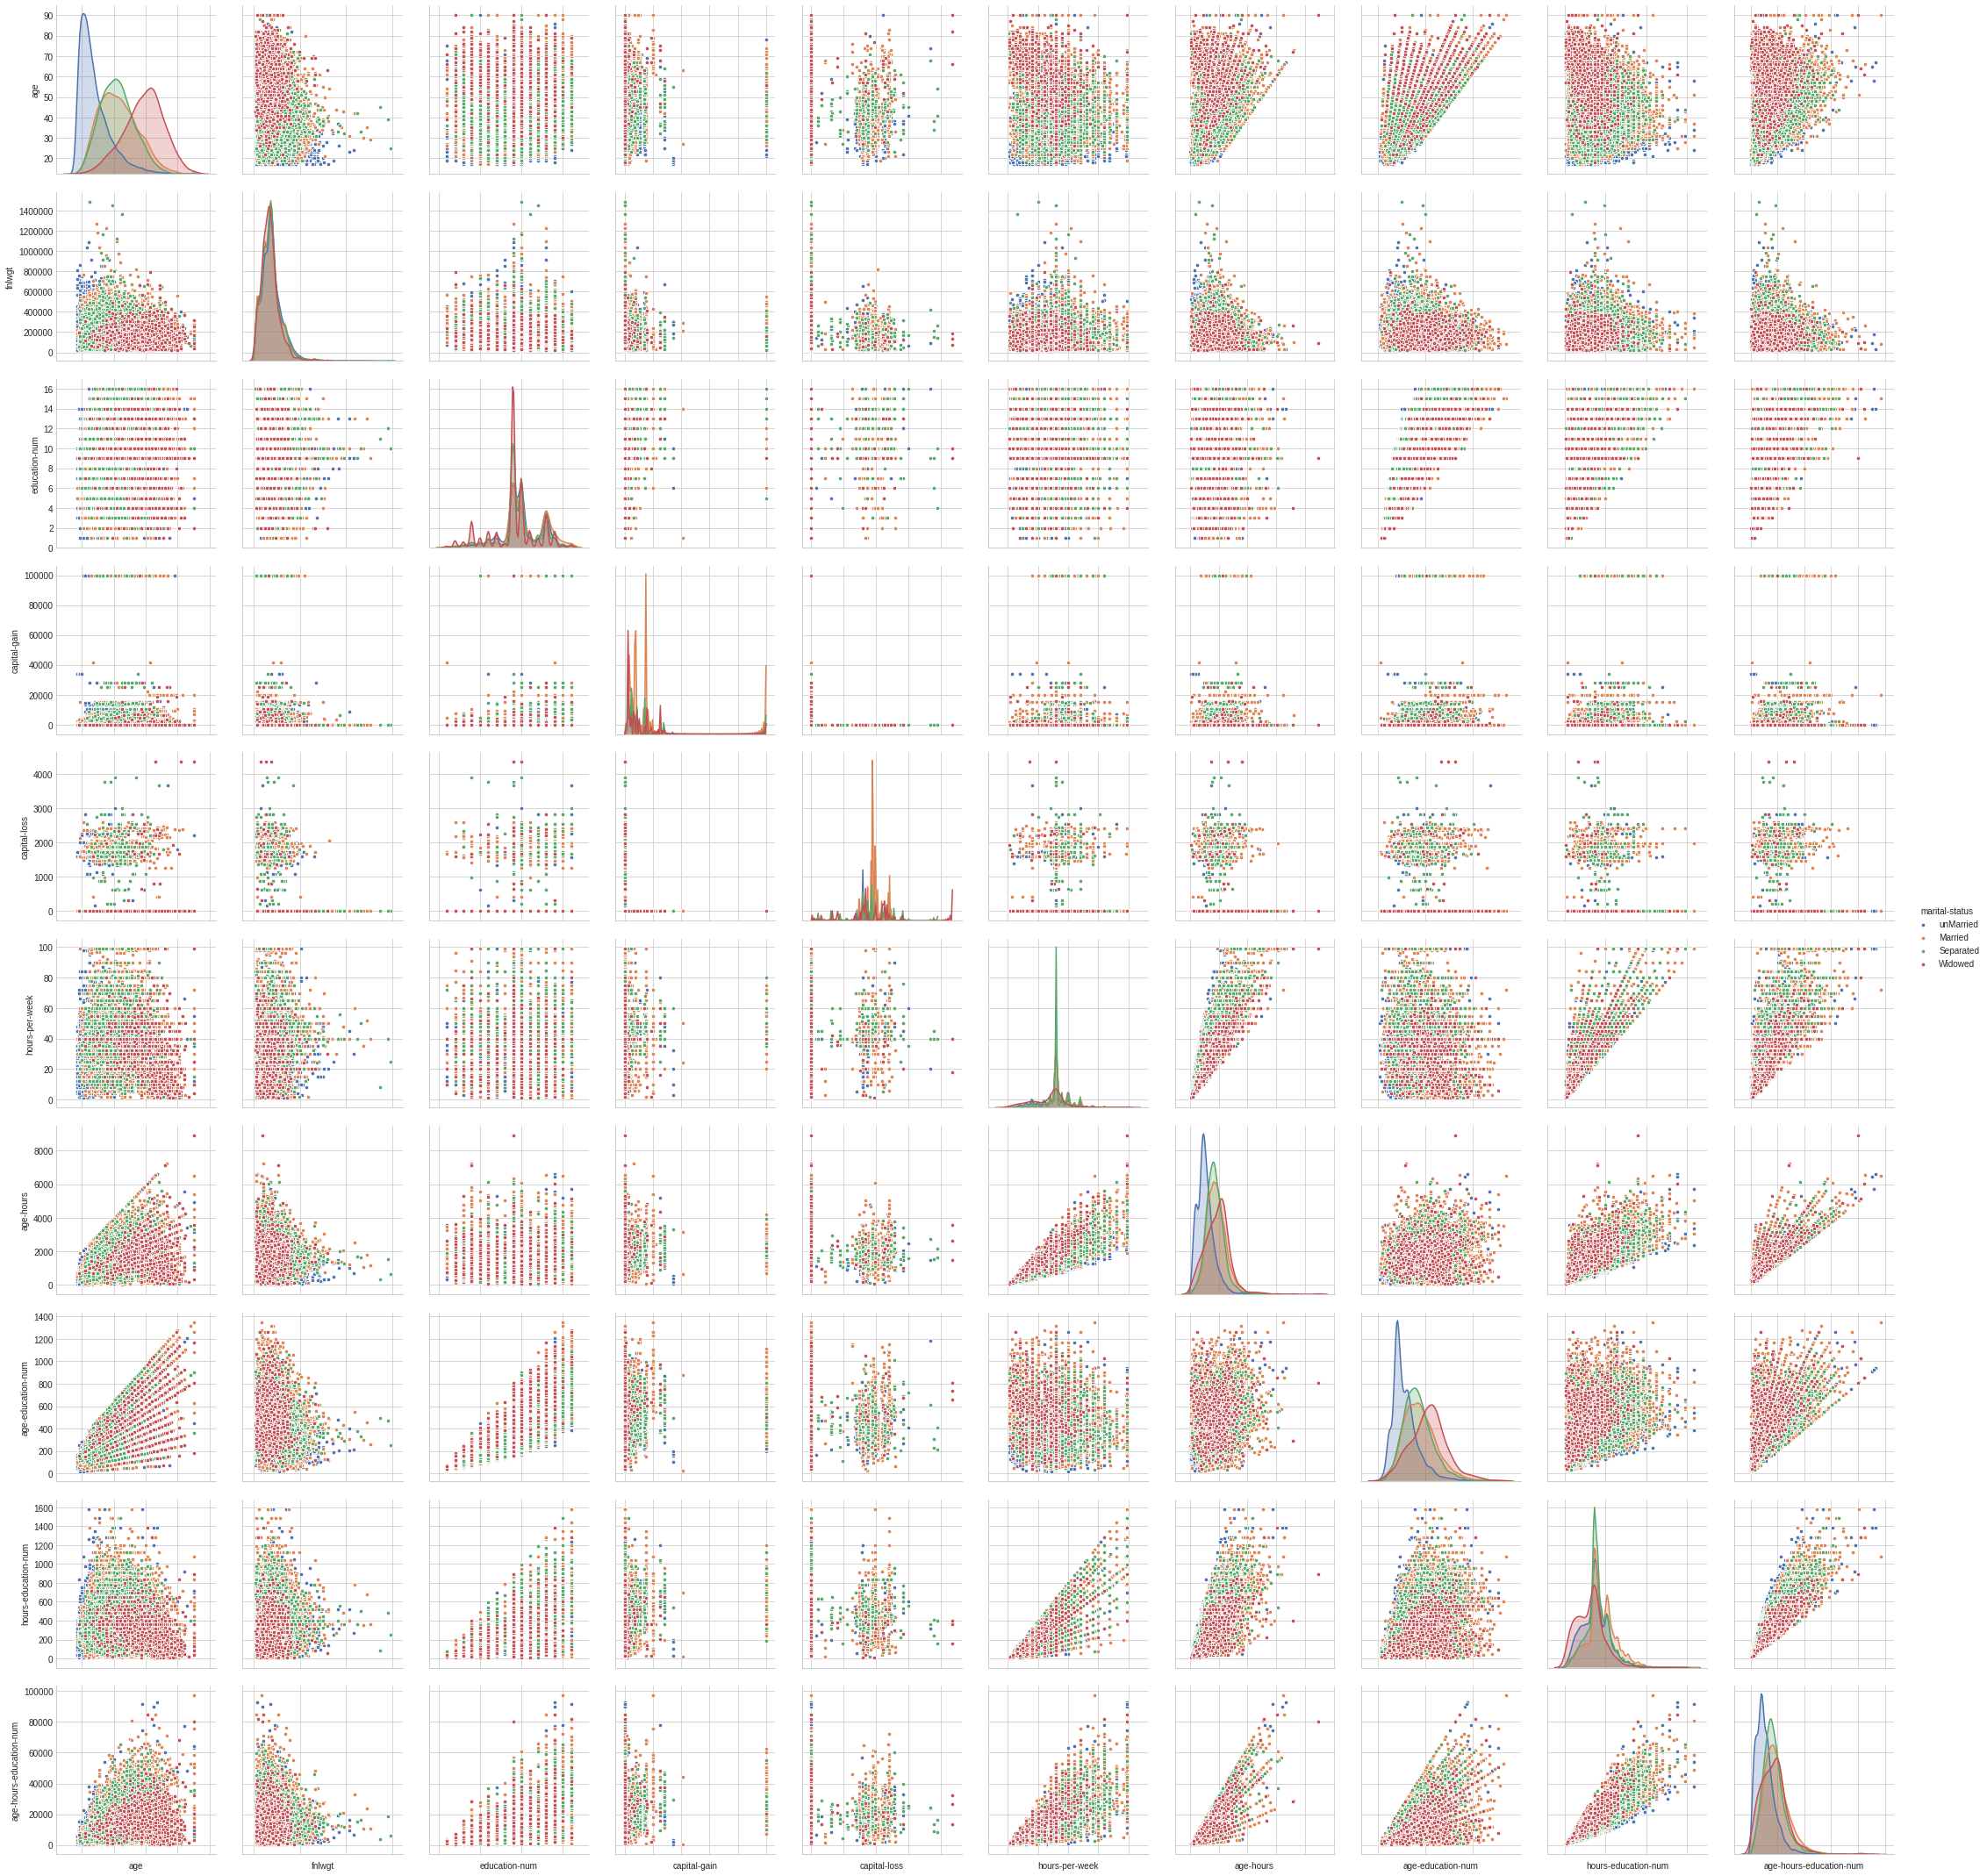

In [ ]:
#pair plots of entire dataset
pp = sns.pairplot(train_data, hue = 'marital-status', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

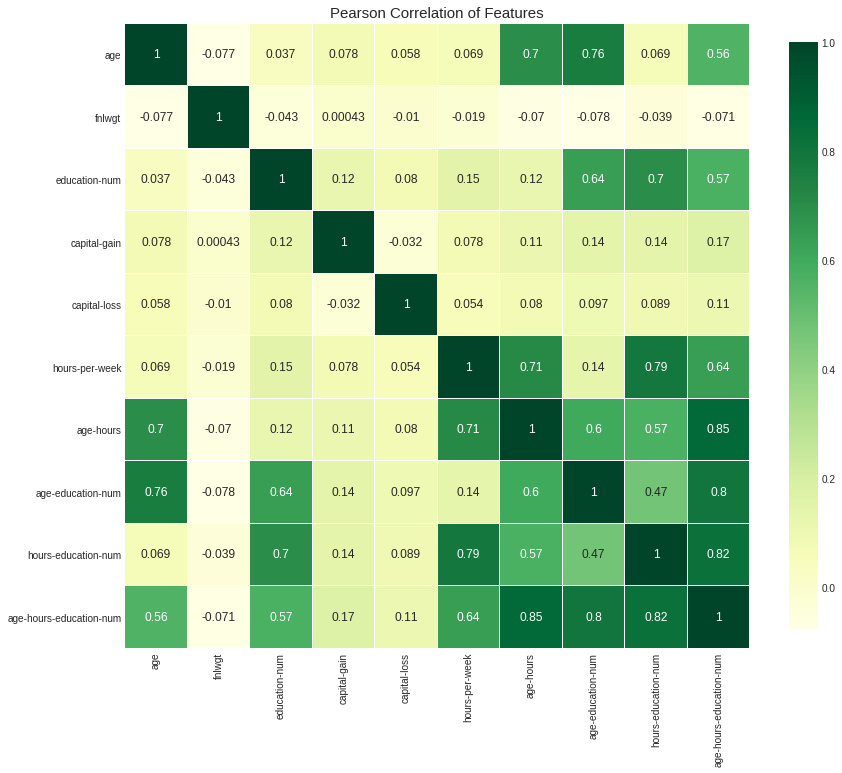

In [ ]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_data)

In [ ]:
train_data.head()
train_data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin,hours-per-week_bin,age-hours,age-hours_bin,age-education-num,age-education-num_bin,hours-education-num,hours-education-num_bin,age-hours-education-num,age-hours-education-num_bin
32556,27.0,Private,257302,CommunityCollege,12,Married,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K,"(24.3, 27.95]","(30.4, 40.2]",1026.0,"(909.9, 1798.8]",324.0,"(285.2, 418.3]",456.0,"(320.8, 478.7]",12312.0,"(9890.1, 19591.2]"
32557,40.0,Private,154374,HighGrad,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K,"(38.9, 42.55]","(30.4, 40.2]",1600.0,"(909.9, 1798.8]",360.0,"(285.2, 418.3]",360.0,"(320.8, 478.7]",14400.0,"(9890.1, 19591.2]"
32558,58.0,Private,151910,HighGrad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K,"(57.15, 60.8]","(30.4, 40.2]",2320.0,"(1798.8, 2687.7]",522.0,"(418.3, 551.4]",360.0,"(320.8, 478.7]",20880.0,"(19591.2, 29292.3]"
32559,22.0,Private,201490,HighGrad,9,unMarried,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K,"(20.65, 24.3]","(10.8, 20.6]",440.0,"(12.111, 909.9]",198.0,"(152.1, 285.2]",180.0,"(162.9, 320.8]",3960.0,"(91.989, 9890.1]"
32560,52.0,Self-emp-inc,287927,HighGrad,9,Married,Exec-managerial,Wife,White,Female,15024,0,40.0,United-States,>50K,"(49.85, 53.5]","(30.4, 40.2]",2080.0,"(1798.8, 2687.7]",468.0,"(418.3, 551.4]",360.0,"(320.8, 478.7]",18720.0,"(9890.1, 19591.2]"


In [ ]:
train_data = train_data.apply(LabelEncoder().fit_transform)
test_data = test_data.apply(LabelEncoder().fit_transform)

train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin,hours-per-week_bin,age-hours,age-hours_bin,age-education-num,age-education-num_bin,hours-education-num,hours-education-num_bin,age-hours-education-num,age-hours-education-num_bin
0,22,7,2671,0,12,3,1,1,4,1,25,0,39,39,0,6,3,631,1,322,3,257,3,1846,2
1,33,6,2926,0,12,0,4,0,4,1,0,0,12,39,0,9,1,290,0,393,4,99,1,857,0
2,21,4,14086,3,8,1,6,1,4,1,0,0,39,39,0,5,3,620,1,228,2,189,2,1333,1
3,36,4,15336,5,6,0,6,0,2,1,0,0,39,39,0,9,3,810,2,247,2,157,1,1431,1
4,11,4,19355,0,12,0,10,5,2,0,0,0,39,5,0,3,3,477,1,241,2,257,3,1409,1


In [ ]:
drop_elements = ['education','fnlwgt', 'native-country','marital-status', 'age_bin', 'hours-per-week_bin','age-hours_bin', 'age-education-num_bin', 'hours-education-num_bin']
y_train = train_data["marital-status"]
x_train = train_data.drop(drop_elements, axis=1)
y_test = test_data["marital-status"]
x_test = test_data.drop(drop_elements, axis=1)
x=pd.concat([x_train, x_test])
y=pd.concat([y_train, y_test])
dataset=pd.concat([train_data, test_data])


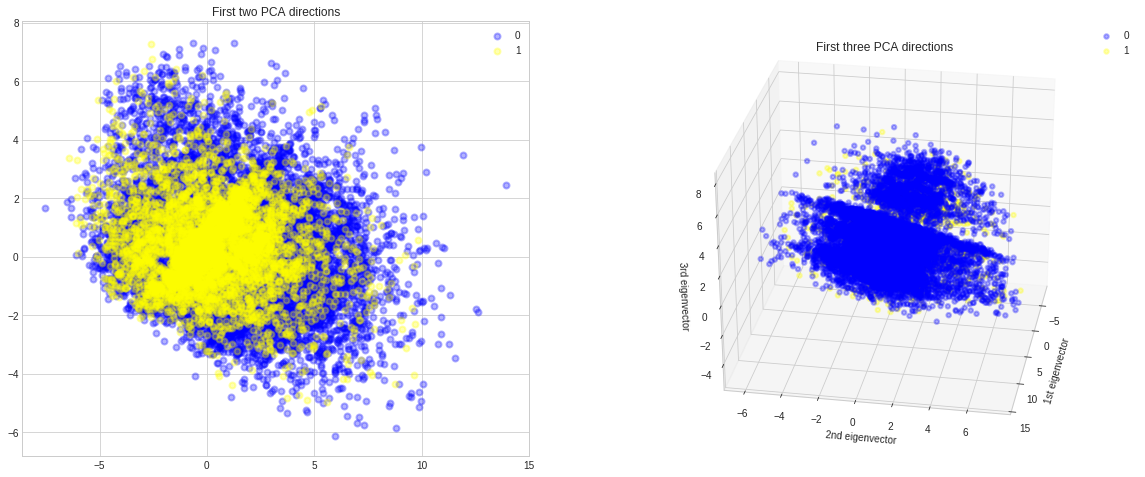

In [ ]:

from sklearn import preprocessing
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(train_data.drop('marital-status', axis=1))
X = std_scale.transform(train_data.drop('marital-status', axis=1))
y = train_data['marital-status']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

In [ ]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(x_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.35557476, 0.45447736, 0.54947591, 0.62751564, 0.69848082,
       0.76439738, 0.82509419, 0.88261874, 0.9281966 , 0.96275559,
       0.9874012 , 0.99574933, 0.99798474, 0.99896806, 0.99987486,
       1.        ])

In [ ]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train, y_train)
y_pred = ppn.predict(x_test)
accuracy_score(y_pred,y_test)
print('The accuracy of Perceptron is',accuracy_score(y_pred,y_test))
score_ppn=cross_val_score(ppn, X,y, cv=5)
print('The cross validation score of Perceptron is',score_ppn.mean())

The accuracy of Perceptron is 0.6001474110926848
The cross validation score of Perceptron is 0.6619586935801702


In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(x_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.6505128677599656


In [ ]:
# Support Vector Classifier (SVM/SVC)
svc = SVC(gamma=0.22)
svc.fit(x_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(x_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.4684601682943308


In [ ]:
clf = MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
                    beta_1=0.9, beta_2=0.999, early_stopping=False,
                    epsilon=1e-08, hidden_layer_sizes=(100, 1000, 1000, 1000, 1000),
                    learning_rate='constant', learning_rate_init=0.001,
                    max_iter=200, momentum=0.9, n_iter_no_change=10,
                    nesterovs_momentum=True, power_t=0.5, random_state=1,
                    shuffle=True, solver='sgd', tol=0.0001,
                    validation_fraction=0.1, verbose=False, warm_start=False)

clf.fit(x_train, y_train)                         

score_multiperceptron_radical = clf.score(x_test,y_test)
print('The accuracy of Multi Perceptron Model is', score_multiperceptron_radical)

The accuracy of Multi Perceptron Model is 0.4684601682943308


In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(x_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy of the Logistic Regression is 0.6702291014065475


In [ ]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(x_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Model is 0.8423929734045821


In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(x_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.5696824519378416


In [ ]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Logistic Regression','Decision Tree','KNN','Random Forest']
models=[GaussianNB(), SVC(kernel='linear'), LogisticRegression(), DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

,CV Mean,Std
Naive Bayes,0.644851,0.007269
Linear Svm,0.745677,0.009434
Logistic Regression,0.733116,0.007347
Decision Tree,0.813888,0.005759
KNN,0.766285,0.008393
Random Forest,0.851418,0.005942


[[7294  140   14  179]
 [  37 1714  107  837]
 [  11  277  197   40]
 [  40  848   36 4510]]


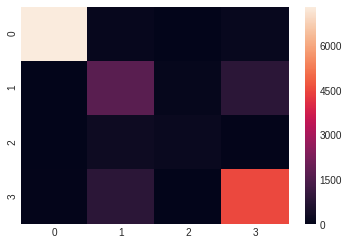

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      7627
           1       0.58      0.64      0.60      2695
           2       0.56      0.38      0.45       525
           3       0.81      0.83      0.82      5434

    accuracy                           0.84     16281
   macro avg       0.73      0.70      0.71     16281
weighted avg       0.85      0.84      0.84     16281



In [ ]:
# Visualise classical Confusion M0atrix
predictions=randomforest.predict(x_test)
CM = confusion_matrix(y_test, predictions)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

predictions=randomforest.predict(x_test)
print(classification_report(y_test, predictions))